<a href="https://colab.research.google.com/github/Malanidhruv/Python-projects/blob/main/FIN_NIFTY_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install pya3

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pya3 import Aliceblue
from datetime import datetime, timedelta
import holidays


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!cp "NSE.csv" /content/drive/MyDrive/

In [15]:
!cp "Nifty Financial Services Historical Data.csv" /content/drive/MyDrive/


In [16]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Nifty Financial Services Historical Data.csv')
# Load the CSV file into a DataFrame
df1 = pd.read_csv('NSE.csv')

# Display the first few rows of the DataFrame to ensure it was loaded correctly
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,17-09-2024,"24,008.65","24,017.00","24,049.60","23,942.55",29.39M,0.08%
1,16-09-2024,"23,989.85","24,039.50","24,080.40","23,935.15",74.80M,0.04%
2,13-09-2024,"23,979.55","24,021.25","24,021.25","23,855.80",89.23M,0.14%
3,12-09-2024,"23,945.60","23,712.20","23,990.25","23,578.45",110.72M,1.54%
4,11-09-2024,"23,582.50","23,625.70","23,725.35","23,542.40",92.50M,-0.28%


In [18]:
import pandas as pd

# Load the CSV file with dayfirst=True
file_path = '/content/Nifty Financial Services Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True, thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [21]:
import pandas as pd

# Load the CSV file without parsing dates initially
file_path = '/content/Nifty Financial Services Historical Data.csv'
df = pd.read_csv(file_path, thousands=',', converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Manually parsing
df.set_index('Date', inplace=True)


In [22]:
print(df.columns)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [23]:
import pandas as pd

# Load the CSV file
file_path = '/content/Nifty Financial Services Historical Data.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',
                 converters={'Change %': lambda x: float(x.strip('%')) / 100})

# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Rename 'Change %' to 'pct'
df.rename(columns={'Change %': 'pct'}, inplace=True)

# Verify column names and data
print(df.columns)
print(df.head())

# Resample data to get monthly percentage change (sum of daily percentage changes in a month)
monthly_pct_change = df['pct'].resample('M').sum()

# Convert the result to a DataFrame for further manipulation
monthly_df = monthly_pct_change.to_frame(name='pct')

# Extract year and month for grouping purposes
monthly_df['year'] = monthly_df.index.year
monthly_df['month'] = monthly_df.index.month

# Calculate the average monthly returns and standard deviation
monthly_avg = monthly_df.groupby('month')['pct'].mean()
monthly_std = monthly_df.groupby('month')['pct'].std()

# Combine into a single DataFrame and sort by 'Average Return'
monthly_stats = pd.DataFrame({
    'Average Return': monthly_avg,
    'Standard Deviation': monthly_std
}).sort_values(by='Average Return', ascending=False)

# Display the result
print(monthly_stats)


<ipython-input-23-12c5f162e0d8>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=['Date'], thousands=',',


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'pct'], dtype='object')
               Price      Open      High       Low     Vol.     pct
Date                                                               
2024-09-17  24008.65  24017.00  24049.60  23942.55   29.39M  0.0008
2024-09-16  23989.85  24039.50  24080.40  23935.15   74.80M  0.0004
2024-09-13  23979.55  24021.25  24021.25  23855.80   89.23M  0.0014
2024-09-12  23945.60  23712.20  23990.25  23578.45  110.72M  0.0154
2024-09-11  23582.50  23625.70  23725.35  23542.40   92.50M -0.0028
       Average Return  Standard Deviation
month                                    
4            0.040056            0.064896
5            0.039262            0.109138
10           0.032767            0.052574
11           0.022753            0.081861
7            0.020419            0.059106
3            0.019106            0.112159
6            0.017875            0.045566
9            0.017644            0.069181
12           0.007340            

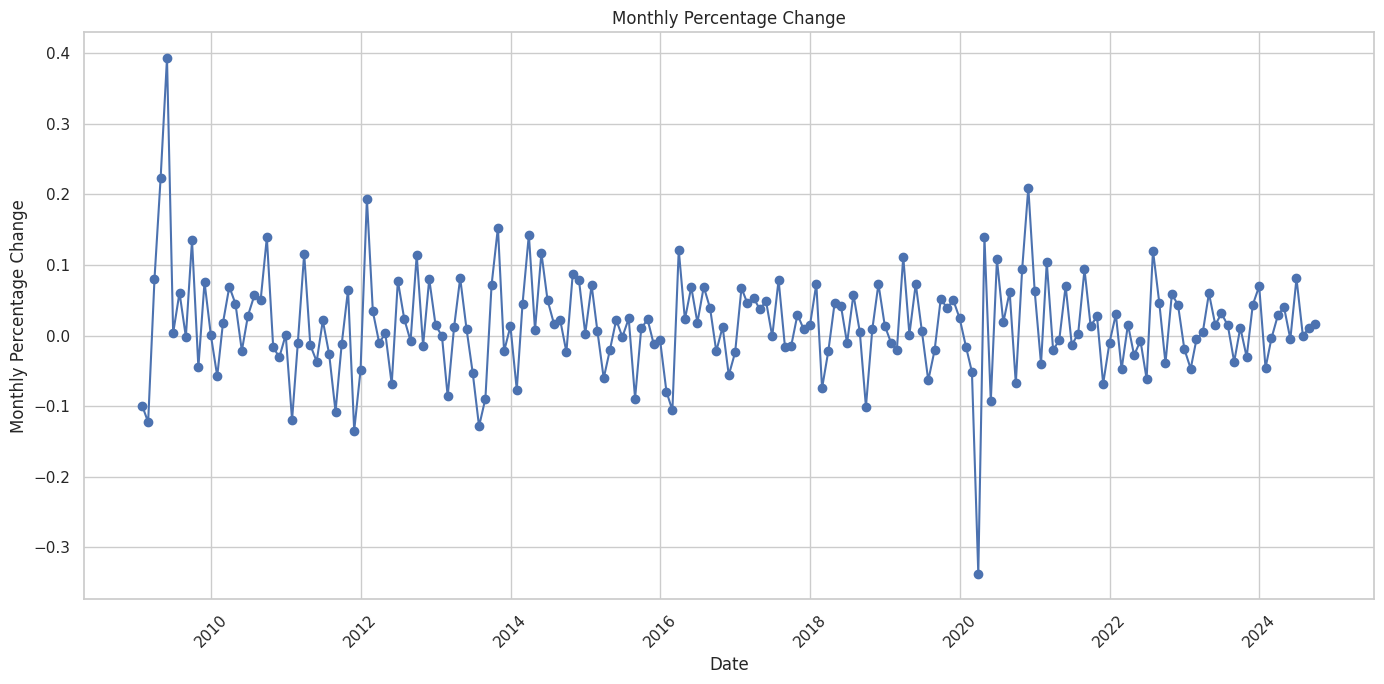

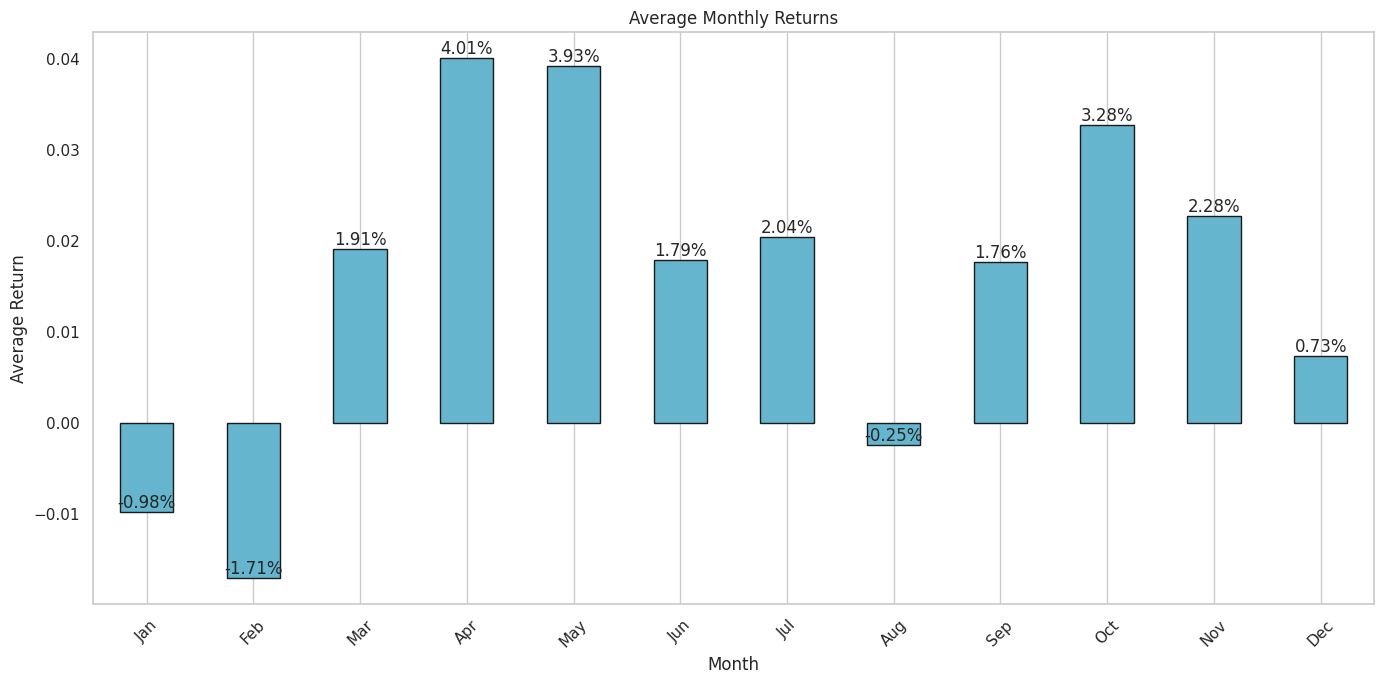

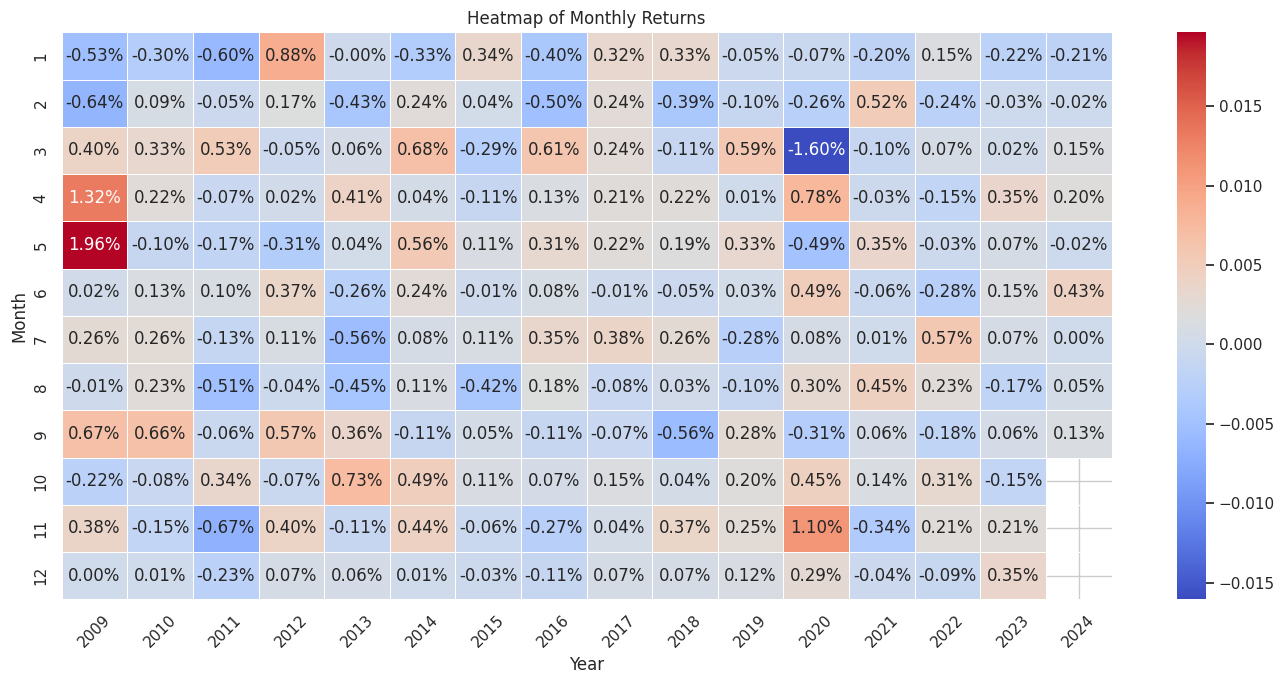

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Line Plot of Monthly Percentage Change
plt.figure(figsize=(14, 7))
plt.plot(monthly_df.index, monthly_df['pct'], marker='o', linestyle='-', color='b')
plt.title('Monthly Percentage Change')
plt.xlabel('Date')
plt.ylabel('Monthly Percentage Change')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar Plot of Average Monthly Returns with Annotations
plt.figure(figsize=(14, 7))
bars = monthly_avg.plot(kind='bar', color='c', edgecolor='k')

# Annotate each bar with its value
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2%}',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom')

plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Heatmap of Monthly Returns
# Resample data to get monthly returns (mean of daily percentage changes)
monthly_returns = df['pct'].resample('M').mean()
monthly_returns = monthly_returns.reset_index()

# Add year and month columns
monthly_returns['Year'] = monthly_returns['Date'].dt.year
monthly_returns['Month'] = monthly_returns['Date'].dt.month

# Pivot table to get a matrix format for the heatmap
heatmap_data = monthly_returns.pivot(index='Month', columns='Year', values='pct')

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2%", linewidths=0.5)
plt.title('Heatmap of Monthly Returns')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2009, 1, 1)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks with April in Top 3 Months of Highest Average Return:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        685, 1922, 4306, 317, 23650, 5900, 21808, 4963, 1997, 21770, 18652, 3045, 16675, 11957, 1333, 4244, 17971, 467, 14299, 15355
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months
        top_months = monthly_stats.head(3)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        if 4 in top_months.index:  # Check if July (7) is one of the top 3 months
            stock_name = get_stock_name(alice, token)
            top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: Mb8UdbbQsBujSKlCjc3hlq97P6dx19xeSqQxTKIetKDZN6miJtnkN95Np8nsJ80TGZlIrINv5MOV2LlzOGL70WP1OjWRqnHseH5BmZbUpn7BXin7gjY2jUvRHXBpZUmv

Stocks with April in Top 3 Months of Highest Average Return:

CHOLAFIN-EQ:
January: 4.90%
July: 4.79%
April: 4.50%

KOTAKBANK-EQ:
May: 7.79%
April: 5.39%
October: 3.37%

SHRIRAMFIN-EQ:
June: 22.51%
April: 7.07%
November: 6.79%

BAJFINANCE-EQ:
July: 8.63%
June: 6.78%
April: 3.52%

AXISBANK-EQ:
April: 5.68%
October: 4.27%
May: 3.47%

SBILIFE-EQ:
July: 9.54%
April: 5.27%
May: 3.40%

ICICIBANK-EQ:
October: 7.16%
April: 5.97%
May: 3.91%

LICHSGFIN-EQ:
April: 6.92%
June: 5.53%
May: 4.39%

ICICIGI-EQ:
July: 5.88%
November: 5.11%
April: 2.79%

ICICIPRULI-EQ:
July: 7.03%
April: 6.78%
June: 6.16%

SBIN-EQ:
October: 5.11%
May: 3.96%
April: 3.76%

BAJAJFINSV-EQ:
July: 6.99%
April: 6.56%
June: 4.48%

IDFC-EQ:
April: 4.89%
September: 4.06%
July: 3.75%

HDFCBANK-EQ:
May: 4.12%
November: 3.36%
April: 3.26%

SBICARD-EQ:
July: 8

In [29]:
# MONTHLY data of average returns

def get_user_credentials():
    user_id = input("Enter your user ID: ")
    api_key = input("Enter your API key: ")
    return user_id, api_key

def initialize_alice():
    user_id, api_key = get_user_credentials()
    alice = Aliceblue(user_id=user_id, api_key=api_key)
    alice.get_session_id()
    return alice

def analyze_stock(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)

    from_datetime = datetime(2009, 1, 1)
    to_datetime = datetime(2024, 9, 9)
    interval = "D"

    historical_data = alice.get_historical(instrument, from_datetime, to_datetime, interval)
    df = pd.DataFrame(historical_data)

    # Preprocess data
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('datetime', inplace=True)
    df['pct'] = df['close'].pct_change()
    df.columns = df.columns.str.strip()
    df = df.drop(columns=['open', 'high', 'low', 'close', 'volume']).dropna()

    # Resample data to get monthly percentage change
    monthly_pct_change = df['pct'].resample('M').sum()
    df = monthly_pct_change.to_frame(name='pct')

    # Extract year and month for analysis
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Calculate average monthly returns and standard deviation
    monthly_avg = df.groupby('month')['pct'].mean()
    monthly_std = df.groupby('month')['pct'].std()

    # Combine into a single DataFrame
    monthly_stats = pd.DataFrame({
        'Average Return': monthly_avg,
        'Standard Deviation': monthly_std
    }).sort_values(by='Average Return', ascending=False)

    return monthly_stats

def print_signals(top_stocks):
    print("\nStocks return on monthly basis:")
    for stock_name, top_months, month_names in top_stocks:
        print(f"\n{stock_name}:")
        for month, name in zip(top_months.index, month_names):
            print(f"{name}: {top_months.loc[month, 'Average Return']:.2%}")

def get_stock_name(alice, token):
    instrument = alice.get_instrument_by_token('NSE', token)
    return instrument.name

def save_to_csv(top_stocks, filename="top_stocks.csv"):
    data = []
    for stock_name, top_months, month_names in top_stocks:
        for month, name in zip(top_months.index, month_names):
            data.append({
                'Stock Name': stock_name,
                'Month': name,
                'Average Return': top_months.loc[month, 'Average Return']
            })

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"\nData saved to {filename}")

def main():
    # Initialize Aliceblue object and get credentials
    alice = initialize_alice()

    # List of tokens to analyze
    tokens = [
        685, 1922, 4306, 317, 23650, 5900, 21808, 4963, 1997, 21770, 18652, 3045, 16675, 11957, 1333, 4244, 17971, 467, 14299, 15355
    ]

    top_stocks = []

    for token in tokens:
        monthly_stats = analyze_stock(alice, token)

        # Get top three months based on average returns
        top_months = monthly_stats.head(12)
        month_names = top_months.index.map(lambda x: datetime(1900, x, 1).strftime('%B'))

        # Add the stock to the list regardless of specific months
        stock_name = get_stock_name(alice, token)
        top_stocks.append((stock_name, top_months, month_names))

    # Print signals
    print_signals(top_stocks)

    # Save results to CSV
    save_to_csv(top_stocks)

if __name__ == "__main__":
    main()


Enter your user ID: 1141826
Enter your API key: Mb8UdbbQsBujSKlCjc3hlq97P6dx19xeSqQxTKIetKDZN6miJtnkN95Np8nsJ80TGZlIrINv5MOV2LlzOGL70WP1OjWRqnHseH5BmZbUpn7BXin7gjY2jUvRHXBpZUmv

Stocks return on monthly basis:

CHOLAFIN-EQ:
January: 4.90%
July: 4.79%
April: 4.50%
February: 3.75%
September: 3.28%
October: 2.89%
August: 1.95%
November: 1.88%
March: 1.87%
May: 1.28%
December: 0.20%
June: -1.45%

KOTAKBANK-EQ:
May: 7.79%
April: 5.39%
October: 3.37%
November: 3.26%
March: 2.15%
August: 1.95%
June: -0.16%
December: -0.35%
February: -0.36%
September: -0.69%
January: -2.29%
July: -2.92%

SHRIRAMFIN-EQ:
June: 22.51%
April: 7.07%
November: 6.79%
January: 6.13%
August: 5.65%
July: 5.21%
September: 1.61%
December: 1.13%
March: 0.92%
May: -1.35%
October: -1.61%
February: -3.56%

BAJFINANCE-EQ:
July: 8.63%
June: 6.78%
April: 3.52%
February: 3.21%
May: 3.05%
October: 3.02%
December: 2.76%
August: 2.64%
November: 1.76%
January: 0.26%
March: -0.07%
September: -3.19%

MUTHOOTFIN-EQ:
October: 5.32%
May: 

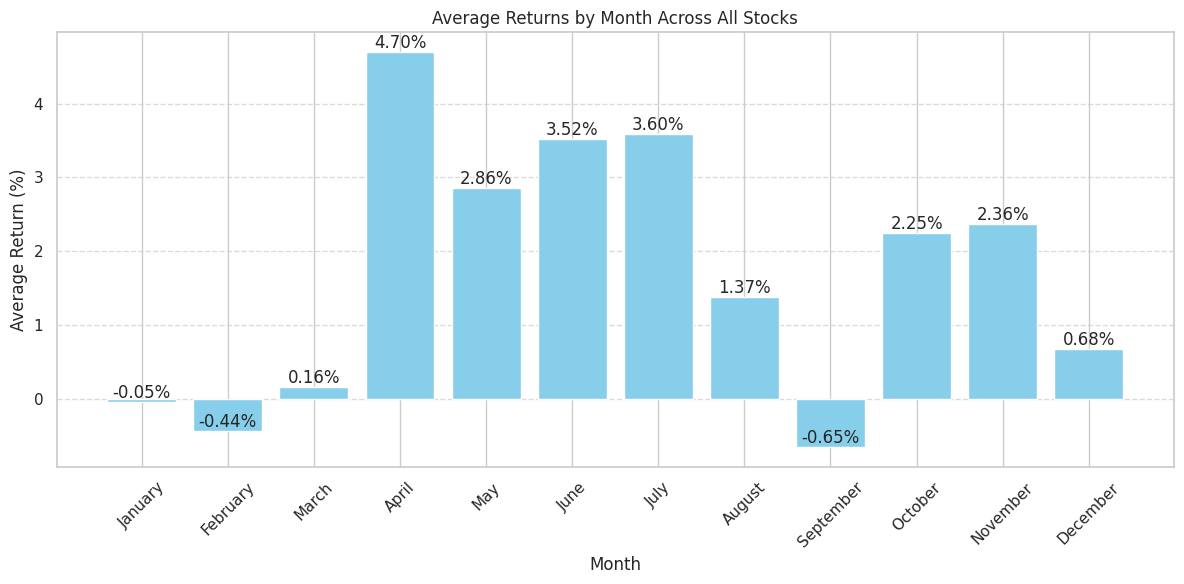

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for each stock's monthly returns
data = {
    'Stock': ['CHOLAFIN-EQ', 'KOTAKBANK-EQ', 'SHRIRAMFIN-EQ', 'BAJFINANCE-EQ', 'MUTHOOTFIN-EQ',
              'AXISBANK-EQ', 'SBILIFE-EQ', 'ICICIBANK-EQ', 'LICHSGFIN-EQ', 'ICICIGI-EQ',
              'ICICIPRULI-EQ', 'SBIN-EQ', 'BAJAJFINSV-EQ', 'IDFC-EQ', 'HDFCBANK-EQ',
              'HDFCAMC-EQ', 'SBICARD-EQ', 'HDFCLIFE-EQ', 'PFC-EQ', 'RECLTD-EQ'],
    'January': [4.90, -2.29, 6.13, 0.26, 2.84, 2.97, -0.79, 0.58, 0.34, -2.84, 0.73, -1.71, -2.08, -1.82, -1.42, -4.02, -1.17, -1.40, -1.18, 1.04],
    'February': [3.75, -0.36, -3.56, 3.21, 2.99, -0.50, -2.72, -3.52, -3.91, 1.85, -1.36, -1.46, 4.16, -2.19, 0.19, -0.32, 0.62, -4.84, 1.60, -2.45],
    'March': [1.87, 2.15, 0.92, -0.07, -3.01, 0.39, -3.84, 1.69, 3.73, 0.60, 1.59, 1.26, -0.23, -1.55, 2.91, -4.44, -3.58, 0.81, -0.45, 2.48],
    'April': [4.50, 5.39, 7.07, 3.52, 2.36, 5.68, 5.27, 5.97, 6.92, 2.79, 6.78, 3.76, 6.56, 4.89, 3.26, 4.56, 2.93, 5.29, 2.42, 4.08],
    'May': [1.28, 7.79, -1.35, 3.05, 3.61, 3.47, 3.40, 3.91, 4.39, 2.01, 1.30, 3.96, 3.57, 2.48, 4.12, 2.71, 0.57, 2.58, 2.01, 2.29],
    'June': [-1.45, -0.16, 22.51, 6.78, 3.34, 1.41, 2.34, -0.46, 5.53, 0.79, 6.16, 0.95, 4.48, 1.31, 2.89, 4.81, 1.14, 2.33, 1.48, 4.13],
    'July': [4.79, -2.92, 5.21, 8.63, 2.79, -4.69, 9.54, 3.23, -2.11, 5.88, 7.03, 2.65, 6.99, 3.75, -4.36, 3.80, 8.74, 6.66, 2.84, 3.45],
    'August': [1.95, 1.95, 5.65, 2.64, 2.99, -0.27, 1.70, 0.12, -0.33, 2.76, -0.77, -3.52, 3.92, 0.72, 0.30, 5.74, 2.89, 1.52, -3.23, 0.75],
    'September': [3.28, -0.69, 1.61, -3.19, 0.53, 1.68, -3.86, 1.36, 3.59, -0.52, -1.68, -3.52, -3.58, 4.06, -0.65, -5.05, 0.41, -2.65, 0.04, -4.24],
    'October': [2.89, 3.37, -1.61, 3.02, 5.32, 4.27, 2.16, 7.16, 1.43, 0.83, -0.86, 5.11, 0.58, 0.23, 1.53, 2.65, -4.39, -0.30, 5.55, 6.02],
    'November': [1.88, 3.26, 6.79, 1.76, -0.48, 1.50, 2.33, 0.99, 2.31, 5.11, -0.60, -2.15, 4.05, 1.00, 3.36, 7.85, -2.70, 5.13, 2.01, 3.90],
    'December': [0.20, -0.35, 1.13, 2.76, 2.21, 1.01, 2.44, -3.80, -2.97, 2.22, -0.85, 0.34, 2.32, 0.16, 0.32, 1.62, 1.04, 0.11, 2.22, 1.42]
}



# Convert to DataFrame
df = pd.DataFrame(data)

# Set the month as the index
df = df.set_index('Stock')

# Calculate the average return for each month across all stocks
monthly_avg_returns = df.mean()

# Create a DataFrame for plotting
monthly_avg_returns = monthly_avg_returns.reset_index()
monthly_avg_returns.columns = ['Month', 'Average Return']

# Define the order of months for sequential plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_returns['Month'] = pd.Categorical(monthly_avg_returns['Month'], categories=months_order, ordered=True)
monthly_avg_returns = monthly_avg_returns.sort_values('Month')

# Plot the average returns
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_avg_returns['Month'], monthly_avg_returns['Average Return'], color='skyblue')

# Add the return values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Average Returns by Month Across All Stocks')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


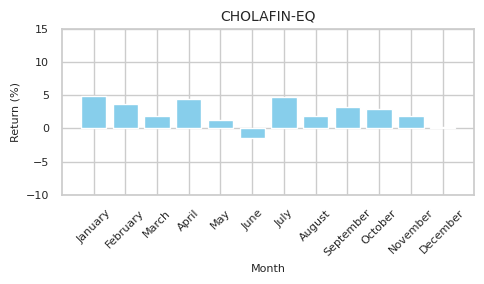

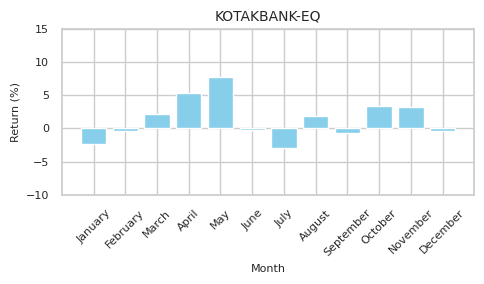

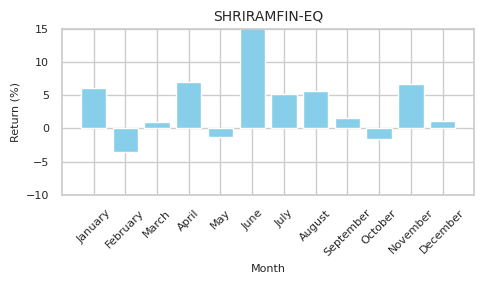

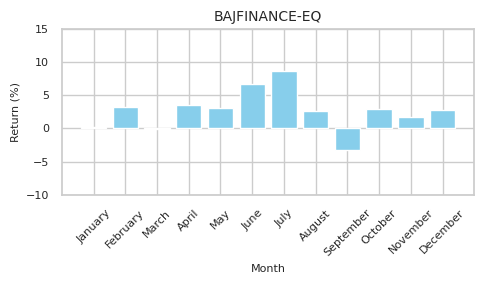

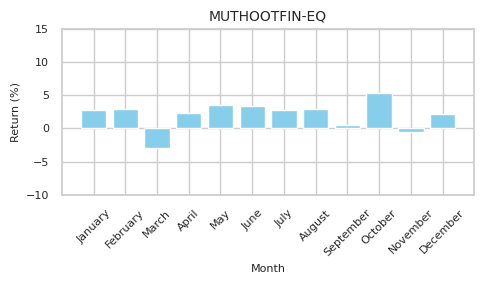

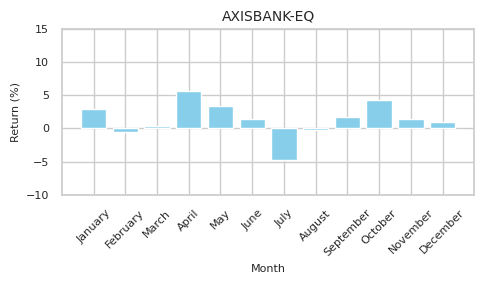

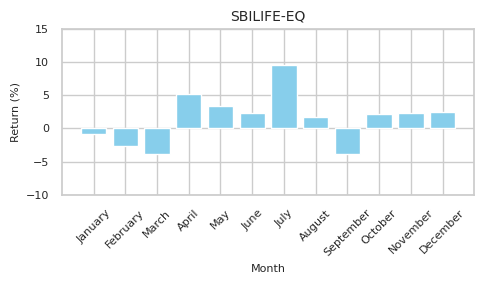

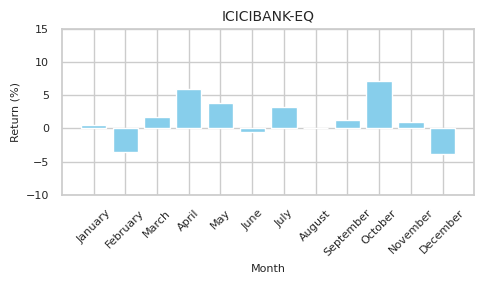

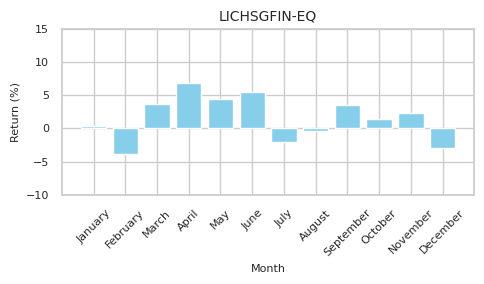

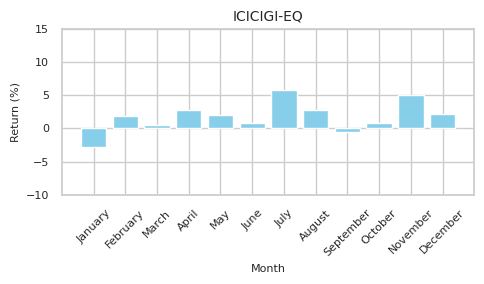

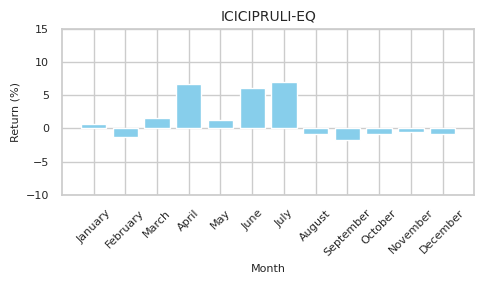

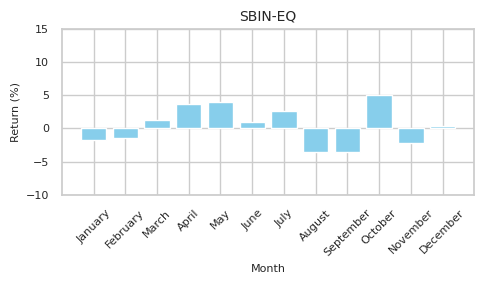

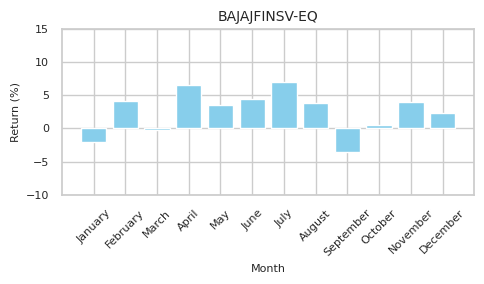

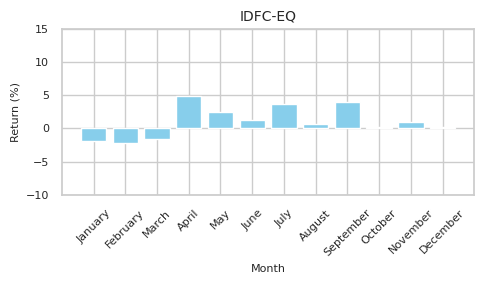

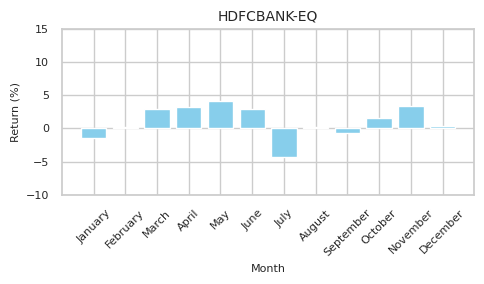

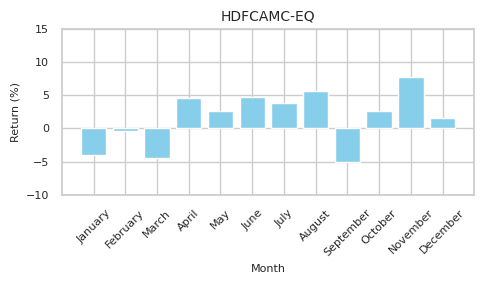

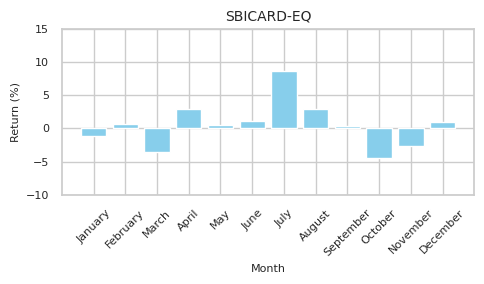

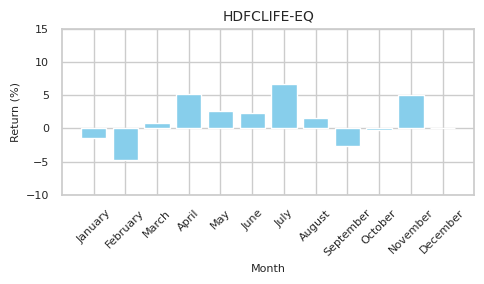

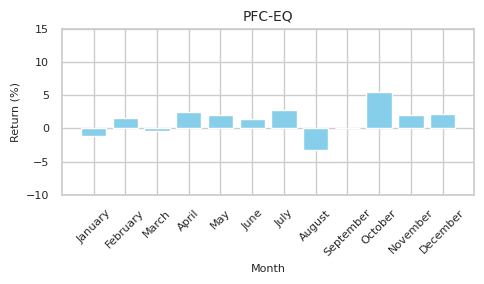

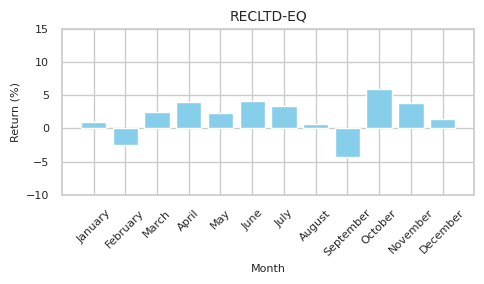

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for each stock's monthly returns
data = {
    'Stock': ['CHOLAFIN-EQ', 'KOTAKBANK-EQ', 'SHRIRAMFIN-EQ', 'BAJFINANCE-EQ', 'MUTHOOTFIN-EQ',
              'AXISBANK-EQ', 'SBILIFE-EQ', 'ICICIBANK-EQ', 'LICHSGFIN-EQ', 'ICICIGI-EQ',
              'ICICIPRULI-EQ', 'SBIN-EQ', 'BAJAJFINSV-EQ', 'IDFC-EQ', 'HDFCBANK-EQ',
              'HDFCAMC-EQ', 'SBICARD-EQ', 'HDFCLIFE-EQ', 'PFC-EQ', 'RECLTD-EQ'],
    'January': [4.90, -2.29, 6.13, 0.26, 2.84, 2.97, -0.79, 0.58, 0.34, -2.84, 0.73, -1.71, -2.08, -1.82, -1.42, -4.02, -1.17, -1.40, -1.18, 1.04],
    'February': [3.75, -0.36, -3.56, 3.21, 2.99, -0.50, -2.72, -3.52, -3.91, 1.85, -1.36, -1.46, 4.16, -2.19, 0.19, -0.32, 0.62, -4.84, 1.60, -2.45],
    'March': [1.87, 2.15, 0.92, -0.07, -3.01, 0.39, -3.84, 1.69, 3.73, 0.60, 1.59, 1.26, -0.23, -1.55, 2.91, -4.44, -3.58, 0.81, -0.45, 2.48],
    'April': [4.50, 5.39, 7.07, 3.52, 2.36, 5.68, 5.27, 5.97, 6.92, 2.79, 6.78, 3.76, 6.56, 4.89, 3.26, 4.56, 2.93, 5.29, 2.42, 4.08],
    'May': [1.28, 7.79, -1.35, 3.05, 3.61, 3.47, 3.40, 3.91, 4.39, 2.01, 1.30, 3.96, 3.57, 2.48, 4.12, 2.71, 0.57, 2.58, 2.01, 2.29],
    'June': [-1.45, -0.16, 22.51, 6.78, 3.34, 1.41, 2.34, -0.46, 5.53, 0.79, 6.16, 0.95, 4.48, 1.31, 2.89, 4.81, 1.14, 2.33, 1.48, 4.13],
    'July': [4.79, -2.92, 5.21, 8.63, 2.79, -4.69, 9.54, 3.23, -2.11, 5.88, 7.03, 2.65, 6.99, 3.75, -4.36, 3.80, 8.74, 6.66, 2.84, 3.45],
    'August': [1.95, 1.95, 5.65, 2.64, 2.99, -0.27, 1.70, 0.12, -0.33, 2.76, -0.77, -3.52, 3.92, 0.72, 0.30, 5.74, 2.89, 1.52, -3.23, 0.75],
    'September': [3.28, -0.69, 1.61, -3.19, 0.53, 1.68, -3.86, 1.36, 3.59, -0.52, -1.68, -3.52, -3.58, 4.06, -0.65, -5.05, 0.41, -2.65, 0.04, -4.24],
    'October': [2.89, 3.37, -1.61, 3.02, 5.32, 4.27, 2.16, 7.16, 1.43, 0.83, -0.86, 5.11, 0.58, 0.23, 1.53, 2.65, -4.39, -0.30, 5.55, 6.02],
    'November': [1.88, 3.26, 6.79, 1.76, -0.48, 1.50, 2.33, 0.99, 2.31, 5.11, -0.60, -2.15, 4.05, 1.00, 3.36, 7.85, -2.70, 5.13, 2.01, 3.90],
    'December': [0.20, -0.35, 1.13, 2.76, 2.21, 1.01, 2.44, -3.80, -2.97, 2.22, -0.85, 0.34, 2.32, 0.16, 0.32, 1.62, 1.04, 0.11, 2.22, 1.42]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot each stock's returns individually in smaller, more compact figures
for i, stock in enumerate(df['Stock']):
    plt.figure(figsize=(5, 3))  # Reduce figure size for compactness
    plt.bar(df.columns[1:], df.loc[i, df.columns[1:]], color='skyblue')
    plt.title(stock, fontsize=10)  # Reduce font size of title
    plt.xlabel('Month', fontsize=8)  # Smaller axis labels
    plt.ylabel('Return (%)', fontsize=8)
    plt.xticks(rotation=45, fontsize=8)  # Smaller ticks
    plt.yticks(fontsize=8)
    plt.ylim(-10, 15)  # Adjust y-axis limits for better bar visibility
    plt.tight_layout()
    plt.show()

